In [196]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import math
import pylab as pl
from scipy.signal import find_peaks
from scipy.signal import butter, freqz, filtfilt, firwin, iirnotch, lfilter
matplotlib.style.use('ggplot')
%matplotlib notebook
def pull_data(dir_name, file_name):
    f = open(dir_name + '/' + file_name + '.csv')
    xs = []
    ys = []
    zs = []
    rs = []
    timestamps = []
    f.readline() # ignore headers
    for line in f:
        value = line.split(',')
        if len(value) > 3:
            timestamps.append(float(value[-5])) 
            x = float(value[-1])
            y = float(value[-2])
            z = float(value[-3])
            r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
            xs.append(x)
            ys.append(y)
            zs.append(z)
            rs.append(r)
    return np.array(xs), np.array(ys), np.array(zs), np.array(rs), np.array(timestamps)

In [197]:
x_data, y_data, z_data, signal, timestamps = pull_data('data', 'Accelerometer_test_inin')

print(timestamps[-1])
c = timestamps[0]
timestamps = (timestamps - c)/1000000000

1.6153590561873836e+18


<IPython.core.display.Javascript object>


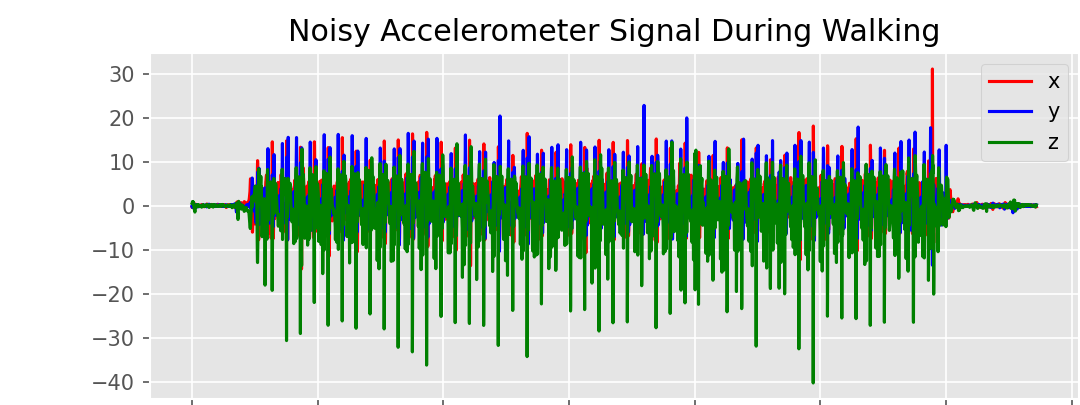

In [198]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(figsize=(8,3))
plt.plot(timestamps, x_data, 'r-',label='x')
plt.plot(timestamps, y_data, 'b-',label='y')
plt.plot(timestamps, z_data, 'g-',label='z')
plt.title("Noisy Accelerometer Signal During Walking")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


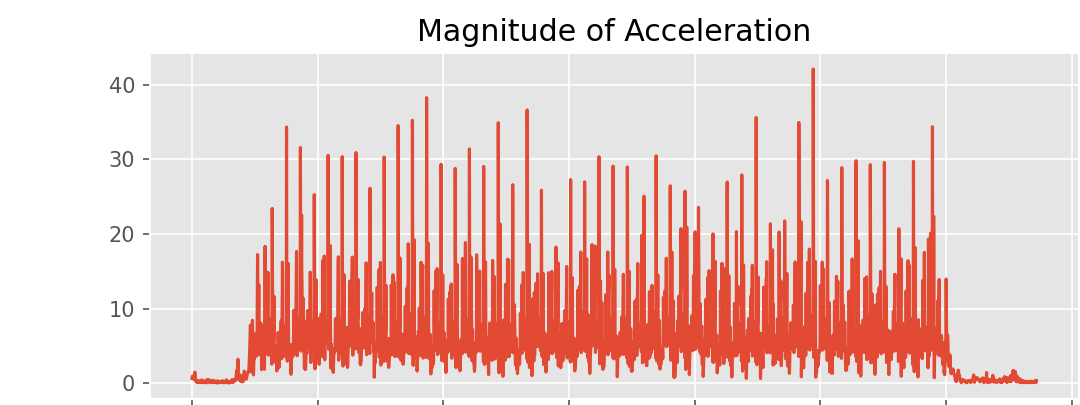

In [199]:
mag = np.sqrt(x_data**2+y_data**2+z_data**2)

plt.figure(figsize=(8,3))
plt.plot(timestamps, mag)
plt.title("Magnitude of Acceleration")
plt.show()

In [201]:
# FILL IN CODE: Create and apply Butterworth filter
# Filter requirements.
order = 5
fs = 50.0  # sample rate, Hz
cutoff = 1.5  # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE]
#see what value gives a decent graph

# Create the filter.
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
filtered_signal = filtfilt(b, a, signal)

<IPython.core.display.Javascript object>


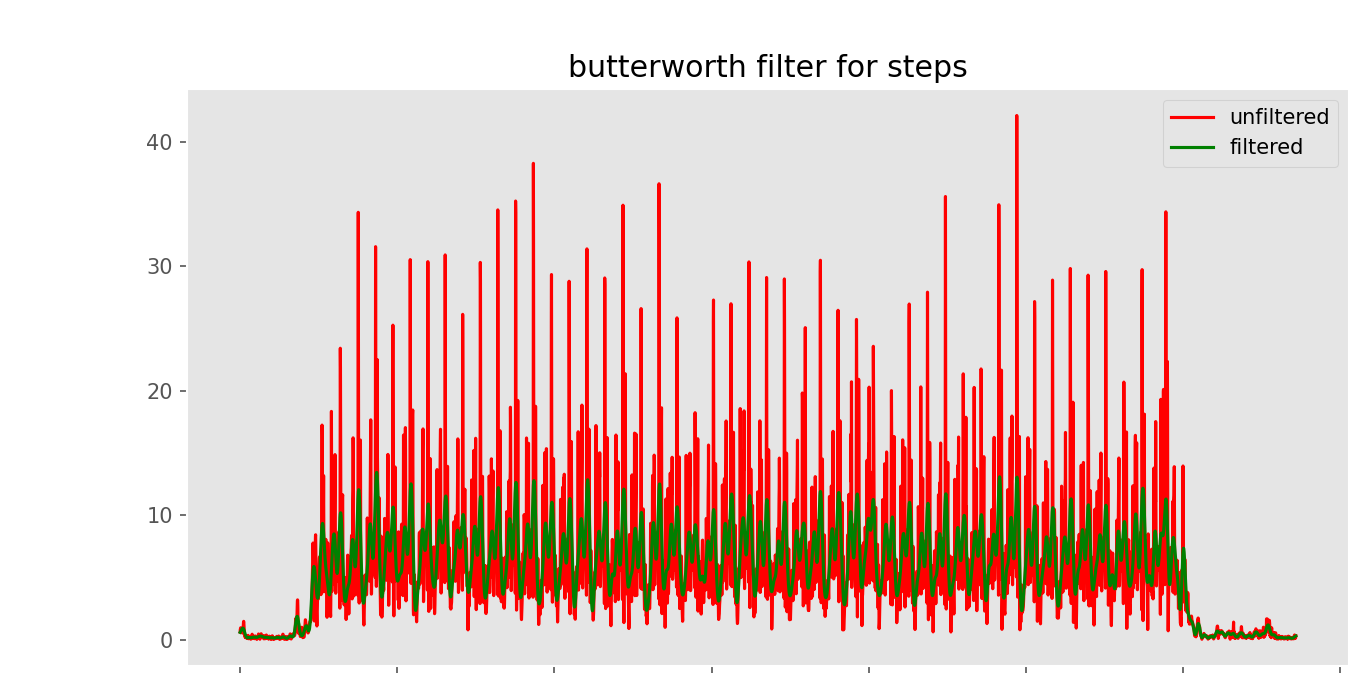

In [202]:
# FILL IN CODE: Plot signals
plt.figure(figsize=(10,5))
pl.plot(timestamps, signal, 'r-',label='unfiltered')
pl.plot(timestamps, filtered_signal, 'g-',label='filtered')
pl.legend()
plt.title("butterworth filter for steps")
pl.grid()
pl.show()

In [203]:
# # FILL IN CODE: Step counting algorithm\
peaks,_ = find_peaks(filtered_signal, height=5.5)
# print(filtered_signal[peaks].mean())
time = []
k=0
for i in range(len(peaks)):
    time.append(timestamps[peaks[i]])

STEP COUNT:  99


<IPython.core.display.Javascript object>


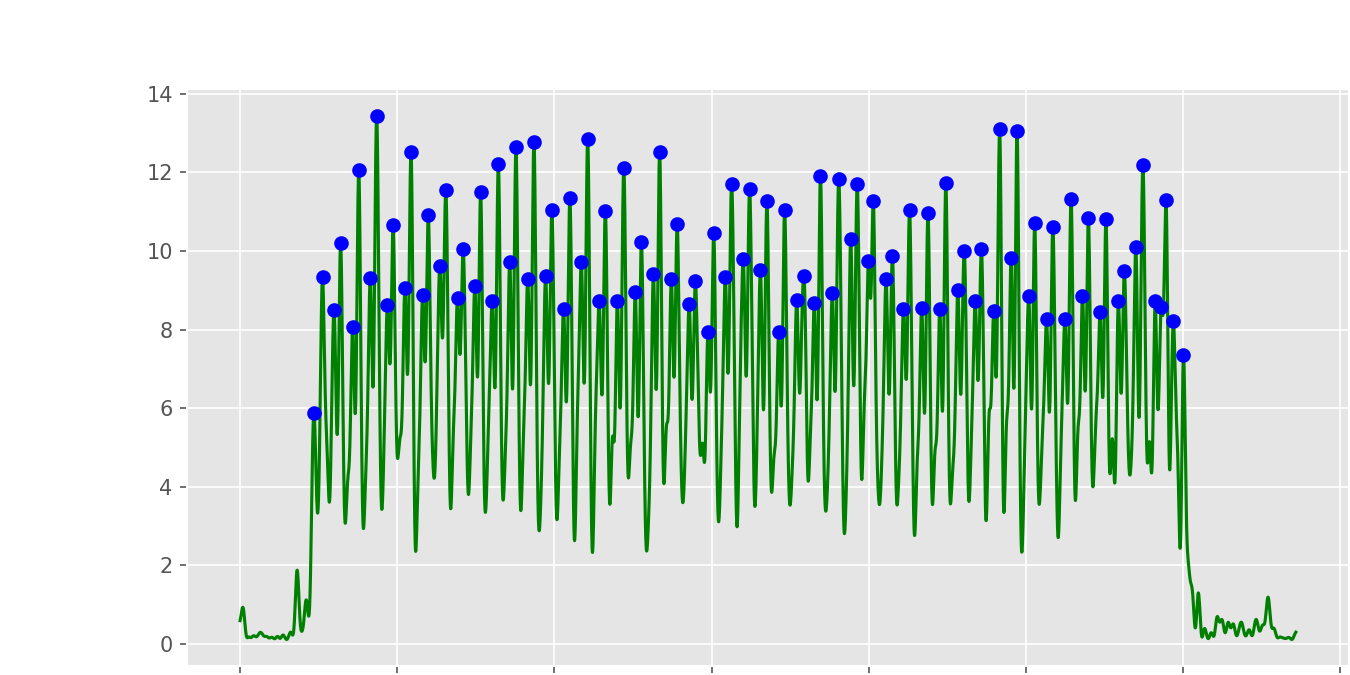

In [205]:
print("STEP COUNT: ",len(time))
plt.figure(figsize=(10,5)) 
pl.plot(timestamps, filtered_signal, 'g-',label='filtered')  
plt.plot(time, filtered_signal[peaks], "ob")